# **Import Libraries and modules**

### Install Keras module for python and import it to run basic keras functions for model building.

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


### Import Numpy library which is usually used to store data. Also import other support libraries in keras for model building and predefined dataset loading.

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
test_features = X_test[:]

### Matplotlib is a visualization tool of python which can be used to plot graphs and display images. Here we first print the total number of images used for training. Then import matplotlib library and show the first training image.

(60000, 28, 28)


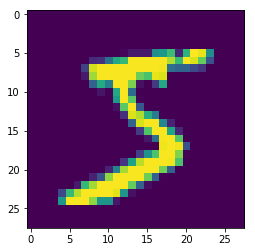

In [27]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

### As the dataset contains single channel images, we reshape array to correct the input channel dimension.

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

### Normalize values between 0 to 1

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

### Show labels of last 10 train data

In [30]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

### Convert 1-dimensional class arrays to 10-dimensional class matrices

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

### Show the matrix converted labels of last 10 images

In [32]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### 4th Code of Assignment 4



In [11]:
from keras.layers import Activation, BatchNormalization, MaxPooling2D, Dropout
model = Sequential()
 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3, activation='relu')) #24
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))#12
model.add(Convolution2D(10, 1, 1, activation='relu')) #12

model.add(Convolution2D(8, 3, 3, activation='relu'))#10
model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3, activation='relu'))#8
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Convolution2D(16, 3, 3, activation='relu'))#6
model.add(BatchNormalization())

model.add(Convolution2D(10, 6, 6))
#keras.layers.AveragePooling2D(pool_size=(4, 4))
#model.add(BatchNormalization())
#model.add(Dropout(0.1))


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
W0818 13:44:06.754667 140318969071488 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0818 13:44:06.756003 140318969071488 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0818 13:44:09.681884 140318969071488 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

/usr/local/lib/python3.6/dist

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 10)        170       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 8)         728       
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (6, 6))`


###Modifications Added to above network
*   ReLU(activation) after BN
*   L2 regularization



In [12]:
from keras.layers import Activation, BatchNormalization, MaxPooling2D, Dropout
from keras import regularizers
model = Sequential()
 
model.add(Convolution2D(10, 3, 3, input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(16, 3, 3)) #24
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))#12
model.add(Convolution2D(10, 1, 1, activation='relu')) #12

model.add(Convolution2D(8, 3, 3))#10
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(16, 3, 3))#8
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Convolution2D(16, 3, 3))#6
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(10, 6, 6))
#keras.layers.AveragePooling2D(pool_size=(4, 4))
#model.add(BatchNormalization())
#model.add(Dropout(0.1))


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3))`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/usr/local/lib/python

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_6 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
activation_2 (Activation)    (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_7 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
activation_3 (Activation)    (None, 24, 24, 16)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 16)        0         
__________

#### Modifications to model hyperparameters

*  Addition of ImageDataGenerator to perform Image Normalization
*  Addition of logic to save best model based on max val. accuracy

**TODO**

*  Addition of L2 regularization of loss





In [13]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
train_iterator = datagen.flow(X_train, Y_train, batch_size=128)

model_saved = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_acc', mode='max')

model_info = model.fit_generator(train_iterator, samples_per_epoch = 60000, nb_epoch = 40, 
                                 validation_data = (X_test, Y_test), 
                                 callbacks=[model_saved, LearningRateScheduler(scheduler, verbose=1)])

W0818 13:44:27.193176 140318969071488 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=468, epochs=40)`
W0818 13:44:27.303140 140318969071488 deprecatio

Epoch 1/40


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '



Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
468/468 [==============================] - 10s 20ms/step - loss: 0.1868 - acc: 0.9414 - val_loss: 0.0580 - val_acc: 0.9813
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
468/468 [==============================] - 5s 12ms/step - loss: 0.0548 - acc: 0.9834 - val_loss: 0.0449 - val_acc: 0.9855
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
468/468 [==============================] - 5s 12ms/step - loss: 0.0425 - acc: 0.9866 - val_loss: 0.0337 - val_acc: 0.9884
Epoch 4/40

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
468/468 [==============================] - 5s 12ms/step - loss: 0.0359 - acc: 0.9884 - val_loss: 0.0283 - val_acc: 0.9909
Epoch 5/40

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
468/468 [==============================] - 5s 11ms/step - loss: 0.0299 - acc: 0.9907 - val_loss: 0.

### Calculate the validation score

In [15]:
model.load_weights(filepath = 'best_model.h5')
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.021171018161420217, 0.9939]


### Predict the label for the test images

In [16]:
y_pred = model.predict(X_test)
print(y_pred[:9])
print(y_test[:9])

[[5.50243271e-12 9.28529809e-10 7.82582799e-09 4.37860450e-08
  1.23646132e-15 4.53136877e-12 9.19770454e-19 1.00000000e+00
  1.04598303e-13 4.93868191e-09]
 [2.85304992e-07 4.79497476e-06 9.99994159e-01 7.13346449e-09
  3.50967755e-10 2.17317917e-12 5.76237369e-07 3.04392483e-11
  8.33508196e-08 3.08921291e-11]
 [1.82019915e-06 9.99955654e-01 6.29484092e-08 2.19436291e-08
  1.15192279e-05 3.55923248e-06 3.19503033e-06 2.16828394e-05
  2.11654339e-07 2.27687042e-06]
 [9.99983549e-01 1.21775255e-11 1.23186465e-08 9.32145561e-09
  4.18377805e-10 1.44033017e-08 1.61931530e-05 9.39991418e-11
  1.35714116e-08 2.22539057e-07]
 [6.32704609e-14 9.56227764e-10 2.37118333e-12 1.30145972e-11
  9.99999523e-01 1.79263576e-10 5.66342221e-13 8.16109402e-11
  4.81182982e-10 4.83460610e-07]
 [1.03401888e-07 9.99990225e-01 4.38535679e-08 3.14523213e-10
  1.58533987e-06 8.95307508e-08 4.02424476e-08 7.83605356e-06
  9.10852105e-09 1.34741910e-07]
 [2.41978572e-16 4.25412554e-06 6.62226524e-11 8.48461839e

### Saving layer names in a dict datatype so that we can later use it for visualization.

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

### Code to Visualise the kernel extracted features of a particular layer and input images.

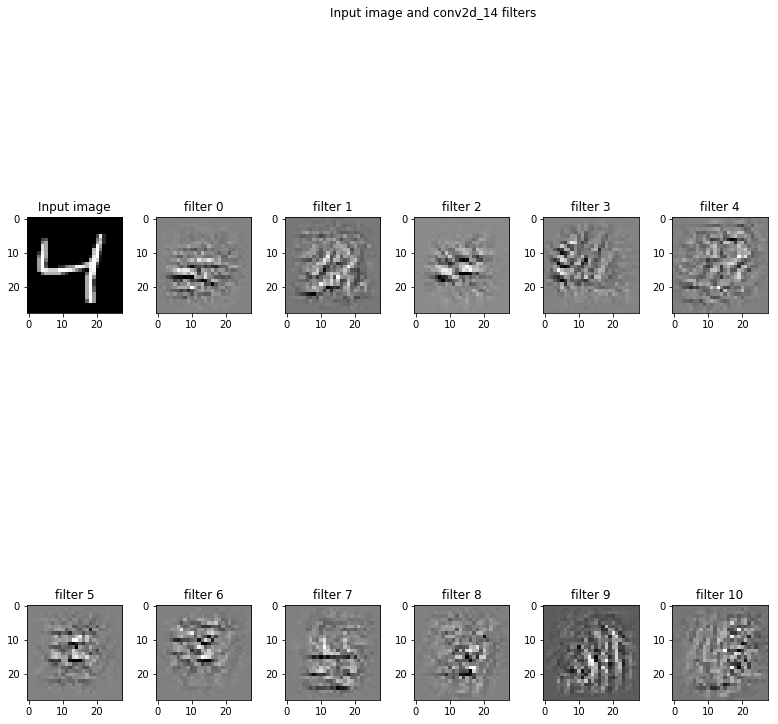

In [19]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

###Visualize 25 of the wrong detections

(10000, 28, 28)


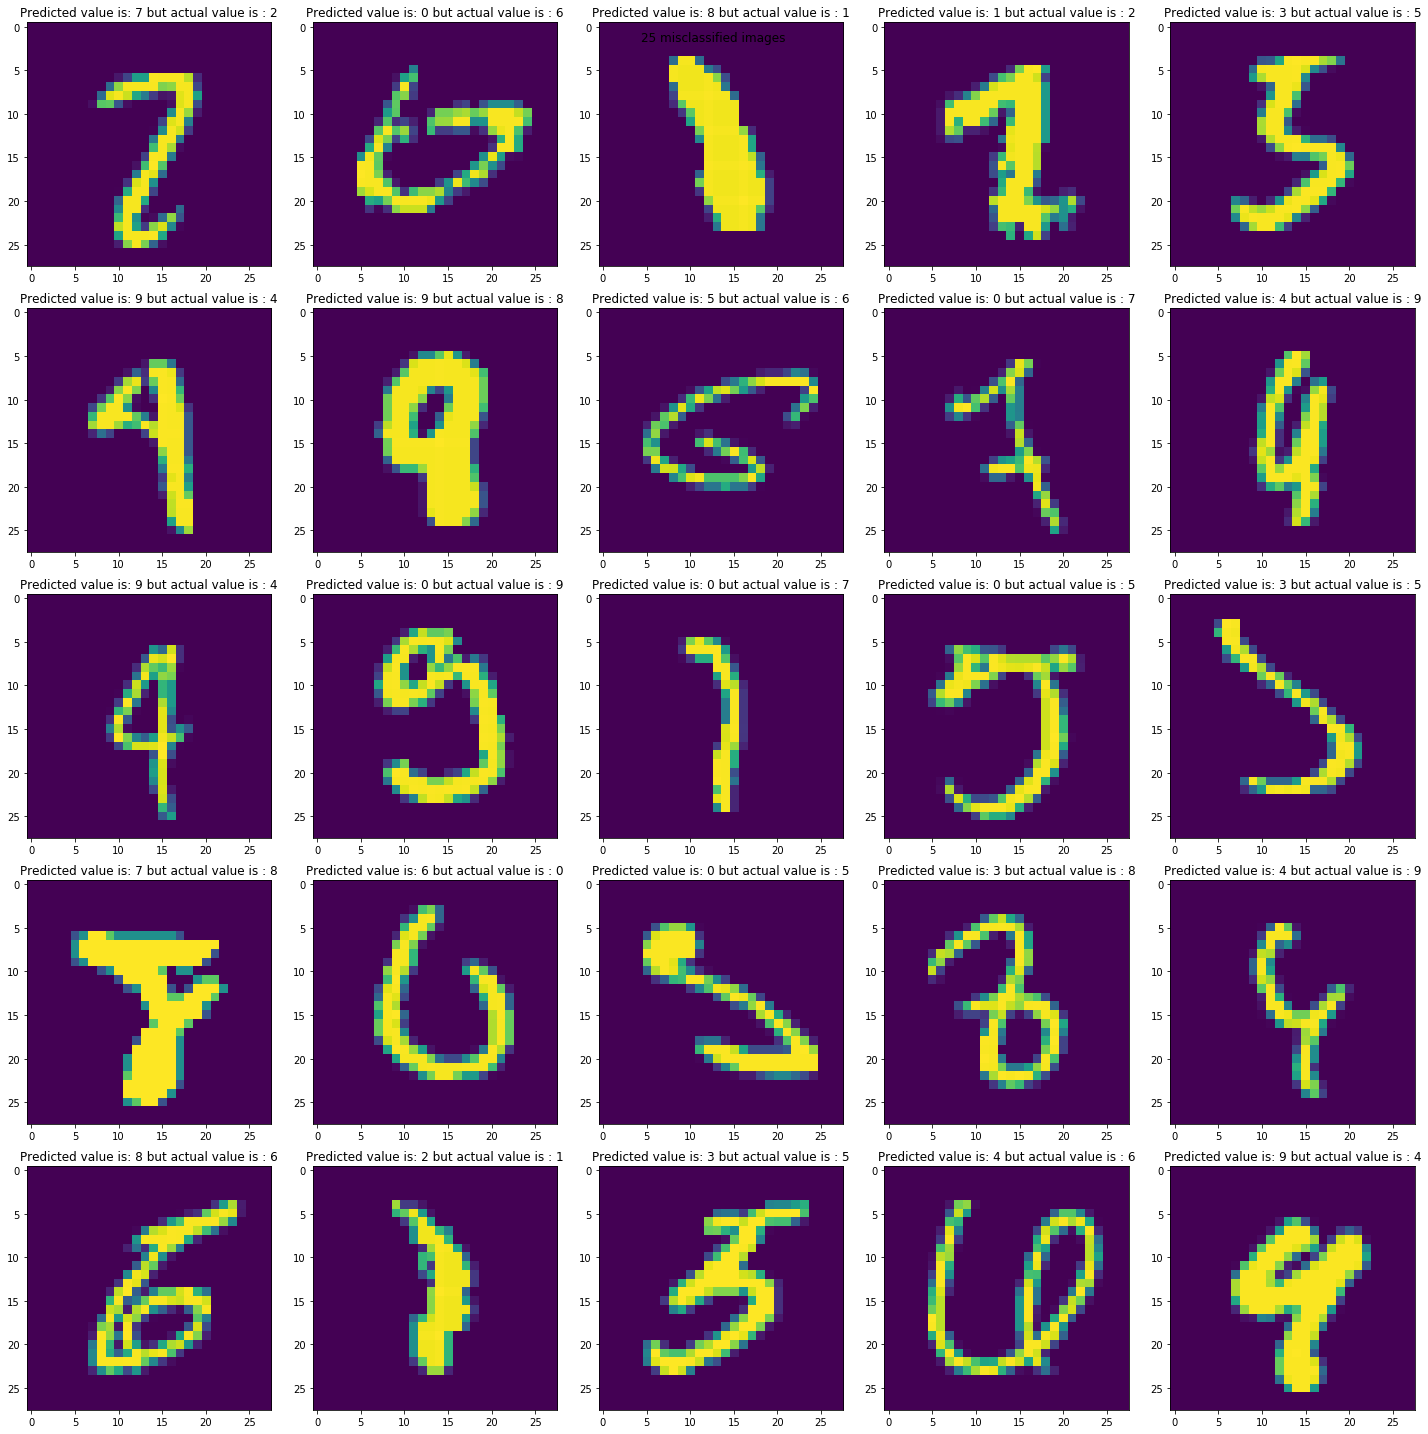

In [33]:
y_pred = model.predict(X_test)
result=[0]*10000
#from a subplot of 5X5 images with each figure of 20X20
fig, ax = plt.subplots(5, 5, figsize = (20, 20))
fig.tight_layout()
#give title to sub plot
fig.suptitle('25 misclassified images')
#find the predicted value and store it in a list
for i in range(10000):
  for j in range(10):
    if(np.round_(y_pred[i][j])-1 == 0):
      result[i]=j
      
print (test_features.shape)     
layer_output= []
count,i = 0,0
x,y=0,0
#iterate over all 10000 images until 25 images are printed
while (i < 10000 and count<25):
  #if the prediction is not equal to actual
  if(y_test[i]-result[i] !=0):
    #show the image
    ax[x,y].imshow(test_features[i])
    ax[x,y].set_title('Predicted value is: %d but actual value is : %d' %(result[i],y_test[i]))
    if(y >= 4):
      y=0
      x+=1
    else:
      y+=1      
    count=count+1
  i+=1